# 05 - Ensemble Learning (Random Forest)

The goal of this exercise is to to develop an understanding how to implement a random forest classifier.

<div class="alert alert-block alert-info">
To solve this notebook you need the knowledge from the previous notebook. If you have problems solving it, take another look at the last week's notebooks.
    
It's also recommended to read the chapter 7 of the book in advance.
</div>

**Task**: In this exercise, the same dataset as last week is used to predict, if a patient has a heart disease or not, depending on some medical measurements.

In [1]:
# Run this cell to import the following modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h2 style="color:blue" align="left">Load and preprocess the data</h2>

First of all, we need to load the dataset.

In [2]:
dataset = pd.read_csv('dataset/heart.dat', delim_whitespace=True)
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


After we've load the dataset, we perform the train-test-split to validate the performance of your model later on. 

In [3]:
from sklearn.model_selection import train_test_split
X = dataset.drop('target', axis=1)
y = dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=dataset['target'])
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((216, 13), (54, 13), (216,), (54,))

We can see, that we have 216 sample in the training set and 54 sample in the test test.

<h2 style="color:blue" align="left">Train and evaluate the model</h2>

Scikit-learn has a built-in model for Random forests called RandomForestClassifier.

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score

<div class="alert alert-block alert-success"><b>Task</b><br> 
Use the metrics Confusion Matrix and Accuracy score to evalute the performance of the random forest model with default hyperparameters. Evaluate the model with the training and the test set. How do you assess the results? Compare the results with the performance to the last week decision tree.
</div>

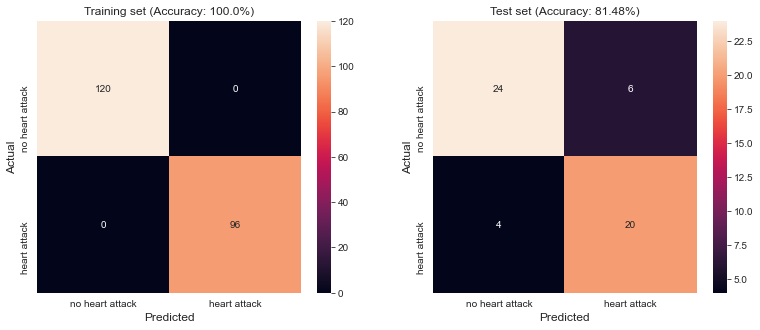

In [6]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
# Write Your Code Here

# Training Set
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_true=y_train, y_pred=y_train_pred)
# Test Set
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_true=y_test, y_pred=y_test_pred)

feature_names=X.columns
class_names=['no heart attack', 'heart attack']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,5))

sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt="d", yticklabels=class_names, xticklabels=class_names, ax=ax1)
ax1.set_title(f'Training set (Accuracy: {round(train_accuracy*100, 2)}%)')
ax1.set_xlabel('Predicted', fontsize=12)
ax1.set_ylabel('Actual', fontsize=12);

sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", yticklabels=class_names, xticklabels=class_names, ax=ax2)
ax2.set_title(f'Test set (Accuracy: {round(test_accuracy*100, 2)}%)')
ax2.set_xlabel('Predicted', fontsize=12)
ax2.set_ylabel('Actual', fontsize=12);

### Evaluation
This model is overfitted as well. It has only predicted 1 less false positive value. Decision tree from last week has 7 FPs.

<h2 style="color:blue" align="left">Train and evaluate the model</h2>

Hyperparameter tuning is about optimizing the performance of the model. In this task, we will first examine the influence of individual hyperparameters on the accuracy. Then we start an automatic search over the total parameter space to find the optimal result. For the performance evaluation we use a cross validation.

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

<div class="alert alert-block alert-success"><b>Task</b><br> 
In the following cells, the influence of different hyperparameters is to be tested. At the beginning of the cell, the values for each hyperparameter are given. Use a for-loop to iterate through the list of values and create a random forest with each parameter. Use a cross-validation with 10 folds for each ensemble. Append the scores to the variable cv_scores. Then you can use the plot_validations function to visualize the results. 
</div>

In [8]:
def plot_validations(cv_scores, x_label, x_ticklabels):
    plt.figure(figsize=(len(x_ticklabels),4))
    ax = sns.boxplot(data=cv_scores)
    ax.set_xticklabels(x_ticklabels)
    ax.set_ylabel('accuracy')
    ax.set_xlabel(x_label);

### n_estimators

Cross validation score for 10 estimator -> 
 [0.95454545 0.72727273 0.63636364 0.72727273 0.72727273 0.86363636
 0.85714286 0.80952381 0.80952381 0.85714286]
Cross validation score for 50 estimator -> 
 [0.81818182 0.77272727 0.72727273 0.77272727 0.63636364 0.86363636
 0.85714286 0.80952381 0.9047619  0.80952381]
Cross validation score for 100 estimator -> 
 [0.86363636 0.77272727 0.68181818 0.86363636 0.72727273 0.90909091
 0.95238095 0.95238095 0.9047619  0.80952381]
Cross validation score for 500 estimator -> 
 [0.81818182 0.77272727 0.68181818 0.86363636 0.77272727 0.90909091
 0.95238095 0.85714286 0.9047619  0.80952381]
Cross validation score for 1000 estimator -> 
 [0.77272727 0.77272727 0.68181818 0.86363636 0.72727273 0.86363636
 0.95238095 0.9047619  0.85714286 0.85714286]


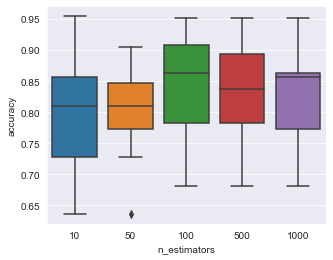

In [11]:
n_trees = [10, 50, 100, 500, 1000]
cv_scores = []
for n_estimator in n_trees:
    # Write Your Code Here
    model = RandomForestClassifier(n_estimator)
    model.fit(X_train, y_train)
    cv = cross_val_score(model, X_train, y_train, cv = 10)
    print('Cross validation score for {} estimator -> \n {}'.format(n_estimator, cv))
    cv_scores.append(cv)
plot_validations(cv_scores, 'n_estimators', n_trees)

### max_depth

Cross validation score for max depth of 1 -> 
 [1.         0.72727273 0.63636364 0.81818182 0.72727273 0.86363636
 0.9047619  0.85714286 0.85714286 0.80952381]
Cross validation score for max depth of 2 -> 
 [0.95454545 0.72727273 0.63636364 0.90909091 0.72727273 0.90909091
 0.95238095 0.95238095 0.85714286 0.85714286]
Cross validation score for max depth of 3 -> 
 [0.90909091 0.77272727 0.63636364 0.86363636 0.77272727 0.90909091
 0.95238095 0.9047619  0.85714286 0.85714286]
Cross validation score for max depth of 4 -> 
 [0.90909091 0.77272727 0.63636364 0.81818182 0.72727273 0.90909091
 0.95238095 0.85714286 0.85714286 0.85714286]
Cross validation score for max depth of 5 -> 
 [0.86363636 0.77272727 0.59090909 0.90909091 0.81818182 0.86363636
 0.95238095 0.9047619  0.9047619  0.85714286]
Cross validation score for max depth of 6 -> 
 [0.81818182 0.77272727 0.68181818 0.81818182 0.77272727 0.81818182
 0.95238095 0.85714286 0.85714286 0.80952381]
Cross validation score for max depth of 

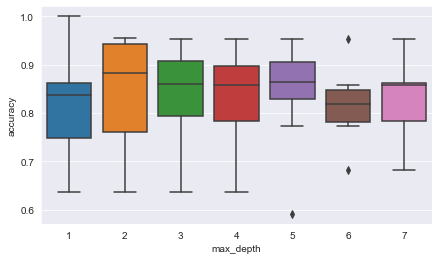

In [17]:
max_depths = range(1,8)
cv_scores = []
# Write Your Code Here
for depth in max_depths:
    model = RandomForestClassifier(max_depth=depth)
    model.fit(X_train, y_train)
    cv = cross_val_score(model, X_train, y_train, cv = 10)
    print('Cross validation score for max depth of {} -> \n {}'.format(depth, cv))
    cv_scores.append(cv)

plot_validations(cv_scores, 'max_depth', max_depths)

### max_features

Cross validation score for max features of 1 -> 
 [0.81818182 0.81818182 0.72727273 0.81818182 0.72727273 0.90909091
 0.95238095 0.9047619  0.85714286 0.85714286]
Cross validation score for max features of 2 -> 
 [0.86363636 0.77272727 0.63636364 0.86363636 0.77272727 0.86363636
 0.85714286 0.85714286 0.85714286 0.80952381]
Cross validation score for max features of 3 -> 
 [0.86363636 0.77272727 0.68181818 0.86363636 0.72727273 0.86363636
 0.95238095 0.80952381 0.9047619  0.85714286]
Cross validation score for max features of 4 -> 
 [0.81818182 0.77272727 0.68181818 0.81818182 0.77272727 0.90909091
 0.95238095 0.85714286 0.9047619  0.85714286]
Cross validation score for max features of 5 -> 
 [0.81818182 0.77272727 0.68181818 0.81818182 0.77272727 0.81818182
 0.9047619  0.95238095 0.9047619  0.9047619 ]
Cross validation score for max features of 6 -> 
 [0.81818182 0.77272727 0.54545455 0.81818182 0.81818182 0.81818182
 0.9047619  0.85714286 0.9047619  0.76190476]
Cross validation score

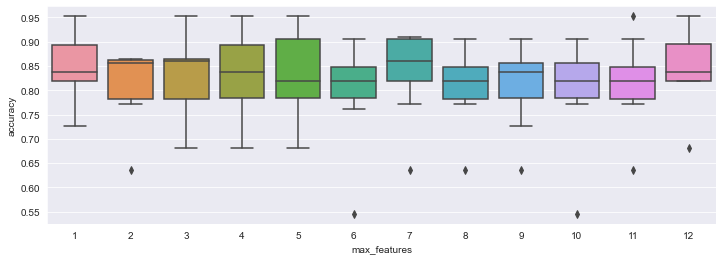

In [20]:
max_features = range(1,X.shape[1])
cv_scores = []
# Write Your Code Here

for feature in max_features:
    model = RandomForestClassifier(max_features=feature)
    model.fit(X_train, y_train)
    cv = cross_val_score(model, X_train, y_train, cv = 10)
    print('Cross validation score for max features of {} -> \n {}'.format(feature, cv))
    cv_scores.append(cv)

plot_validations(cv_scores, 'max_features', max_features)

## GridSearch

With GridSearch you can search over specified parameter values for an estimator. With this search each combination of parameter is tested and evaluated with a cross validation. At the end you will get the set of hyperparameter with the best performance regarding the given metric. 

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import time

<div class="alert alert-block alert-success"><b>Task</b><br> 
Perform a grid search with the previously used hyperparameter set. The grid search with all the needed parameter is already prepared, you only have to fit it to the training set. With grid_search.best_params_ you can see the parameter set with the best cross validation accuracy. For the evaluation on the test set you can run the subsequent cell.
</div>

<div class="alert alert-block alert-warning"> <b>Warning</b><br> 
This evaluation can take up to several minutes. So maybe get yourself a coffee while running this cell. ☕️
</div>

In [22]:
params_grid = {'n_estimators': n_trees,
          'max_features': max_features,
          'max_depth': max_depths}
grid_search = GridSearchCV(model, params_grid, cv=KFold(3, random_state=42, shuffle=True), verbose=3, n_jobs=-1, \
                           scoring='accuracy')
start_time = time.time()
# Write Your Code Here
grid_search.fit(X_train, y_train)
# computation time
comp_time_gs = time.time() - start_time
print("--- Computation time for grid search: %s seconds ---" % comp_time_gs)

Fitting 3 folds for each of 420 candidates, totalling 1260 fits
--- Computation time for grid search: 46.92098689079285 seconds ---


In [23]:
predictions_gs = grid_search.best_estimator_.predict(X_test)
test_accuracy_gs = accuracy_score(y_test, predictions_gs)
print(f'Test set Accuracy: {round(test_accuracy_gs, 4)*100}%.')

Test set Accuracy: 85.19%.


## RandomSearch

In [24]:
from sklearn.model_selection import RandomizedSearchCV

<div class="alert alert-block alert-success"><b>Task</b><br> 
Perform a random search with the previously used hyperparameter set. The random search with all the needed parameter is already prepared, you only have to fit it to the training set. With random_search.best_params_ you can see the parameter set with the best cross validation accuracy. For the evaluation on the test set you can run subsequent cell. 
</div>

In [27]:
random_search = RandomizedSearchCV(model, params_grid, n_iter=100, cv=KFold(3, random_state=42, shuffle=True), verbose=3,\
                                   n_jobs=-1, scoring='accuracy', random_state=42)
start_time = time.time()
# Write Your Code Here
random_search.fit(X_train, y_train)

# computation time
comp_time_rs = time.time() - start_time
print("--- Computation time for random search: %s seconds ---" % comp_time_rs)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
--- Computation time for random search: 10.996299982070923 seconds ---


In [28]:
predictions_rs = random_search.best_estimator_.predict(X_test)
test_accuracy_rs = accuracy_score(y_test, predictions_rs)
print(f'Test set Accuracy: {round(test_accuracy_rs, 4)*100}%.')

Test set Accuracy: 83.33%.


## Comparison GridSearch and RandomSearch

Run the following cell to output a small comprehension of the grid search with random search regarding computation time and accuracy.

In [29]:
print(f'Speed: RandomSearch is {round(comp_time_gs / comp_time_rs, 1)}x faster.')
print(f'Accuracy: RandomSearch is {round((test_accuracy_rs / test_accuracy_gs)-1,4)*100}% more accurate.')

Speed: RandomSearch is 4.3x faster.
Accuracy: RandomSearch is -2.17% more accurate.


## Optimizing the recall

<div class="alert alert-block alert-success"><b>Task</b><br> 
Instead of optimizing the accuracy for a heart disease it is a good idea to optimize the recall. Then we avoid the misclassication of persons who have a disease in the class "no disease". 
Find an apropriate model using RandomSearch.
</div>

In [33]:
# Write Your Code Here
test_recall_rs = recall_score(y_test, predictions_rs)
print(f'Test set recall of model optimized for accuracy: {round(test_recall_rs, 4)*100}%.')

Test set recall of model optimized for accuracy: 83.33%.


In [36]:
# optimize for recall
random_search = RandomizedSearchCV(model, params_grid, n_iter=100, cv=KFold(3, random_state=42, shuffle=True), verbose=3, n_jobs=-1, scoring='recall', random_state=42)

start_time = time.time()
random_search.fit(X_train, y_train)

comp_time_rs = time.time() - start_time
print("--- Computation time for random search: %s seconds ---" % comp_time_rs)

# calculate recall
predictions_rs = random_search.best_estimator_.predict(X_test)
test_recall_rs = recall_score(y_test, predictions_rs)
print(f'Test set recall of model optimized for recall: {round(test_recall_rs, 4)*100}%.')

Fitting 3 folds for each of 100 candidates, totalling 300 fits
--- Computation time for random search: 12.261478900909424 seconds ---
Test set recall of model optimized for recall: 86.67%.


### Evaluation
Randomized search with emphasis on "recall" has increased it by ~3%.

## Gradient Boosting Classifier

In the book Gradient Boosting is applied for regression. Here it should be used for classification. 

<div class="alert alert-block alert-success"><b>Task</b><br> 
Build a model with the Gradient Boosting classifier and measure the time it takes. Compare it to a Random Forest model. 
Use the commands from above to measure accuracy and the confusion matrix. 
</div>

In [38]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=3, n_estimators=120)

start_time = time.time()
gbrt.fit(X_train, y_train)

# computation time
comp_time_rs = time.time() - start_time
print("--- Computation time for gradient boosting: %s seconds ---" % comp_time_rs)

--- Computation time for gradient boosting: 0.03445696830749512 seconds ---


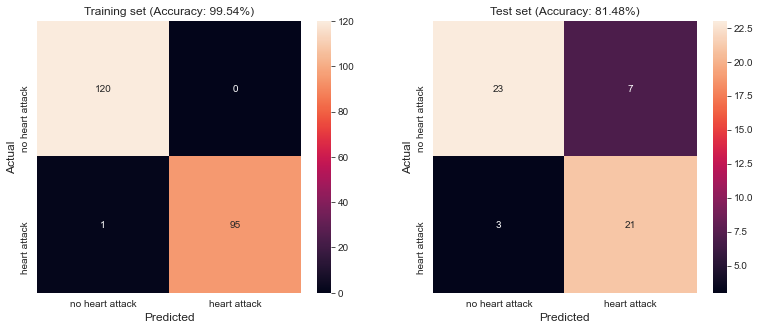

In [49]:
# evaluate model with confusion matrix

# Training Set
y_train_pred = gbrt.predict(X_train)
y_train_pred = y_train_pred.round()
train_accuracy = accuracy_score(y_true=y_train, y_pred=y_train_pred)
# # Test Set
y_test_pred = gbrt.predict(X_test)
y_test_pred = y_test_pred.round()
test_accuracy = accuracy_score(y_true=y_test, y_pred=y_test_pred)

feature_names=X.columns
class_names=['no heart attack', 'heart attack']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,5))

sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt="d", yticklabels=class_names, xticklabels=class_names, ax=ax1)
ax1.set_title(f'Training set (Accuracy: {round(train_accuracy*100, 2)}%)')
ax1.set_xlabel('Predicted', fontsize=12)
ax1.set_ylabel('Actual', fontsize=12);

sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", yticklabels=class_names, xticklabels=class_names, ax=ax2)
ax2.set_title(f'Test set (Accuracy: {round(test_accuracy*100, 2)}%)')
ax2.set_xlabel('Predicted', fontsize=12)
ax2.set_ylabel('Actual', fontsize=12);

## Hist Gradient Boosting

Sci-kit also introduces a new algorithm called HistGradientBoosting Classifier which was inspired by a successful algorithm called LightGBM (see https://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting ). It is much faster for big data sets with nearly the same accuracy. 

<div class="alert alert-block alert-success"><b>Task</b><br> 
Build a model with the Hist Gradient Boosting classifier and measure the time it takes. Compare it to a Random Forest model. 
Use the commands from above to measure accuracy and the confusion matrix. 
</div>

In [53]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(max_depth=3)

st = time.time()
hgb.fit(X_train, y_train)

duration = time.time() - start_time
print("--- Computation time for gradient boosting: %s seconds ---" % comp_time_rs)

--- Computation time for gradient boosting: 0.03445696830749512 seconds ---


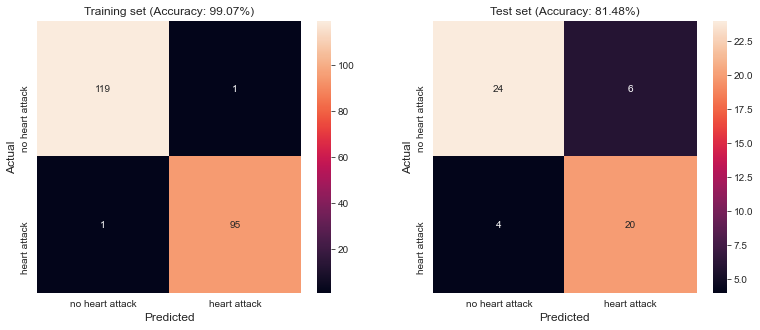

In [55]:
# evaluate model with confusion matrix

# Training Set
y_train_pred = hgb.predict(X_train)
y_train_pred = y_train_pred.round()
train_accuracy = accuracy_score(y_true=y_train, y_pred=y_train_pred)
# # Test Set
y_test_pred = hgb.predict(X_test)
y_test_pred = y_test_pred.round()
test_accuracy = accuracy_score(y_true=y_test, y_pred=y_test_pred)

feature_names=X.columns
class_names=['no heart attack', 'heart attack']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,5))

sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt="d", yticklabels=class_names, xticklabels=class_names, ax=ax1)
ax1.set_title(f'Training set (Accuracy: {round(train_accuracy*100, 2)}%)')
ax1.set_xlabel('Predicted', fontsize=12)
ax1.set_ylabel('Actual', fontsize=12);

sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", yticklabels=class_names, xticklabels=class_names, ax=ax2)
ax2.set_title(f'Test set (Accuracy: {round(test_accuracy*100, 2)}%)')
ax2.set_xlabel('Predicted', fontsize=12)
ax2.set_ylabel('Actual', fontsize=12);

<div class="alert alert-block alert-success"><b>Task</b><br> 
Optimize the model with hyperparameter tuning. Use GridSeachCV to try different learning rates and max_depth.
</div>

In [61]:
learning_rates = np.arange(0.1, 1, 0.1)
params_grid = {'max_depth': max_depths, 'learning_rate': learning_rates}
grid_search = GridSearchCV(hgb, params_grid, cv=KFold(3, random_state=42, shuffle=True), verbose=3, n_jobs=-1, \
                           scoring='accuracy')
start_time = time.time()
# Write Your Code Here
grid_search.fit(X_train, y_train)
# computation time
comp_time_gs = time.time() - start_time
print("--- Computation time for grid search: %s seconds ---" % comp_time_gs)

Fitting 3 folds for each of 63 candidates, totalling 189 fits
--- Computation time for grid search: 1.450188159942627 seconds ---


In [62]:
predictions_hgb = grid_search.best_estimator_.predict(X_test)

# accuracy
test_accuracy_hgb = accuracy_score(y_test, predictions_hgb)
print(f'Test set Accuracy: {round(test_accuracy_hgb, 4)*100}%.')

# recall
test_recall_hgb = recall_score(y_test, predictions_hgb)
print(f'Test set recall: {round(test_recall_rs, 4)*100}%.')

Test set Accuracy: 81.47999999999999%.
Test set recall: 86.67%.


### Evaluation
- The last two are pretty fast. They are slightly inferior in performance but regarding speed they are ahead by far.
- Recall is better without boosting and the focus was on accuracy.
- Accuracy is down by a ~2% but if we were to work with massive amount of data this trade-off between time & accuracy is favorable.